# Terminus Position 
This script uses the CSV output from MaQiT, provided in the terminus position folder. As described in the README text, MaQiT was used to calculate terminus position change using the curvilinear box method. The terminus positions used were manually digitised between 2022 and 2023 from SAR imagery, with two existing datasets used for the remaining timseries: (i) MEaSUREs Weekly to Monthly Greenland Outlet Glacier Terminus Positions from Sentinel-1 Mosaics (2015-2022; https://nsidc.org/data/nsidc-0781/versions/1), and (ii) MEaSUREs Annual Greenland Outlet Glacier Terminus Positions from SAR Mosaics (1990-2015; https://nsidc.org/data/nsidc-0642/versions/2). 


In [61]:
# IMPORT MODULES
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import numpy as np 
import datetime

# OPEN THE MAQIT CSV FILE, IGNORING THE FIRST LINE WHICH SIMPLY STATES THE METHOD USED (e.g. CURVILINEAR BOX METHOD)
# COMBINE YEAR, MONTH AND DAY COLUMNS TO A 'DATE' COLUMN.
MAQIT_CSV = pd.read_csv(r"R:/JAKOBSHAVN/CODE/github/jakobshavn_isbrae/terminus_position/maqit_output_1990_2023.csv", skiprows=1, parse_dates= {"Date" : ["Year","Month","Day"]})

# SORT THE DATAFRAME IN ASCENDING DATE ORDER, PRINTING THE FIRST AND LAST DATES.
MAQIT_CSV.sort_values(by='Date', ascending = True, inplace = True) 
first_date = MAQIT_CSV['Date'][0]
last_date = MAQIT_CSV['Date'].iloc[-1]
first_date_label = first_date.strftime('%d/%m/%Y') 
last_date_label = last_date.strftime('%d/%m/%Y') 
print('The first date in the dataframe is:', first_date_label)
print('The last date in the dataframe is:', last_date_label)

The first date in the dataframe is: 02/03/1990
The last date in the dataframe is: 28/12/2022


# 2018 - 2023

The script creates a copy of the dataframe covering the study period (2018-2023). The first and last date within this dataframe are printed, with terminus position change then calculated relative to the first date. The minimum and maximum terminus positions, calculated relative to the first date, are also printed.

In [62]:
# SLICE THE DATAFRAME BETWEEN 2018 AND 2023, PRINTING THE FIRST AND LAST DATES.
MAQIT_2018_2023 = MAQIT_CSV[(MAQIT_CSV['Date'] >= '2018-01-01') & (MAQIT_CSV['Date'] <= '2022-12-31')].copy()
MAQIT_2018_2023.sort_values(by='Date', ascending=True, inplace=True)
first_date_2018 = MAQIT_2018_2023['Date'].iloc[0]
last_date_2022 = MAQIT_2018_2023['Date'].iloc[-1]
first_date_2018_label = first_date_2018.strftime('%d/%m/%Y') 
last_date__2022_label = last_date_2022.strftime('%d/%m/%Y') 
print('The first date in the dataframe is:', first_date_2018_label)
print('The last date in the dataframe is:', last_date__2022_label)
print()

# CREATE A NEW COLUMN 'TP_RELATIVE_TO_FIRST_DATE' AND CALCULATE, PRINTING THE MINIMUM AND MAXIMUM VALUES WITHIN THE STUDY PERIOD.
MAQIT_2018_2023['TP_RELATIVE_TO_FIRST_DATE'] = MAQIT_2018_2023['Terminus position relative to most recent observation (m)'].iloc[0] - MAQIT_2018_2023['Terminus position relative to most recent observation (m)']
min_TP_position = MAQIT_2018_2023['TP_RELATIVE_TO_FIRST_DATE'].min()
max_TP_position = MAQIT_2018_2023['TP_RELATIVE_TO_FIRST_DATE'].max()
print('The minimum terminus position, relative to the first observation on', first_date_2018_label, 'is', min_TP_position)
print('The maximum terminus position, relative to the first observation on', first_date_2018_label, 'is +', max_TP_position)

The first date in the dataframe is: 05/01/2018
The last date in the dataframe is: 28/12/2022

The minimum terminus position, relative to the first observation on 05/01/2018 is -4529.1
The maximum terminus position, relative to the first observation on 05/01/2018 is + 2625.8999999999996


Plot a graph showing the change in terminus position, relative to the first date (05/01/2018).

C:\Users\s2451953\AppData\Local\Temp\ipykernel_4720\1093387944.py:31: MatplotlibDeprecationWarning: Passing the emit parameter of set_ylim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.ylim(min_y_value, max_y_value, interval_y)


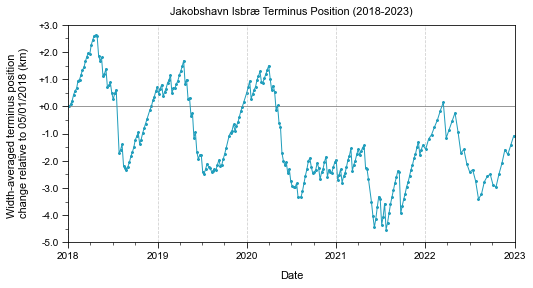

In [66]:
plt.rcParams["font.family"] = "Arial"
fig, ax = plt.subplots(figsize=(8, 4))
ax.axhline(y=0, color='gray', linestyle='-', linewidth=0.8) # Add a horizontal line at 0.
plt.title('Jakobshavn Isbræ Terminus Position (2018-2023)', pad=10, fontsize=11)
plt.ylabel(f"Width-averaged terminus position \n change relative to {first_date_2018_label} (km)", labelpad=10, fontsize=11)
plt.xlabel('Date', labelpad=10, fontsize=11)
plt.grid(axis = 'x', alpha=0.6, linestyle='--')
plt.scatter(MAQIT_2018_2023['Date'], MAQIT_2018_2023['TP_RELATIVE_TO_FIRST_DATE']/1000, color='#219ebc', s=4, marker='x')
plt.plot(MAQIT_2018_2023['Date'], MAQIT_2018_2023['TP_RELATIVE_TO_FIRST_DATE']/1000, color='#219ebc', linewidth=1)

# FORMAT THE X-AXIS TICK LIMITS  
min_x_value = datetime.datetime.strptime('2018-01-01', '%Y-%m-%d')
max_x_value = datetime.datetime.strptime('2023-01-01', '%Y-%m-%d')
plt.xlim(min_x_value, max_x_value)
ax.tick_params(axis='both', which='both', length=6)
three_month_intervals = mdates.MonthLocator(interval=3)
ax.xaxis.set_minor_locator(three_month_intervals)

# FORMAT THE Y-AXIS TICK LIMITS  
min_y_value = -5
max_y_value = 3
interval_y = 1

def format_y_ticks(y, pos):
    if y >= 0:
        return f'+{y:.1f}'  # Add a '+' sign for non-negative values
    else:
        return f'{y:.1f}'

ax.yaxis.set_major_formatter(ticker.FuncFormatter(format_y_ticks))
plt.ylim(min_y_value, max_y_value, interval_y)
plt.yticks(np.arange(min_y_value, max_y_value+0.1, interval_y))
minor_locator = ticker.MultipleLocator(base=0.5)
ax.yaxis.set_minor_locator(minor_locator)

# ADJUST THE HEIGHT OF THE MINOR TICKS
ax.tick_params(axis='x', which='minor', length=3)
ax.tick_params(axis='y', which='minor', length=3)
plt.show()